In [10]:
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np

# load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

n = 10000

# select a random subset of n samples
idx = np.random.choice(X_train.shape[0], n, replace=False)
X_train = X_train[idx]
y_train = y_train[idx]

idx = np.random.choice(X_test.shape[0], n, replace=False)
X_test = X_test[idx]
y_test = y_test[idx]

# normalize the input images to values between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# reshape the input images to a 4D tensor
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# split the dataset into training and testing sets
split_idx = int(len(X_train) * 0.8)
X_train, X_val = X_train[:split_idx], X_train[split_idx:]
y_train, y_val = y_train[:split_idx], y_train[split_idx:]

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# define the CNN architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

# train the model on a dataset
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

Epoch 1/30
250/250 [==============================] - 5s 15ms/step - loss: 0.4856 - accuracy: 0.8526 - val_loss: 0.1895 - val_accuracy: 0.9390
Epoch 2/30
250/250 [==============================] - 3s 14ms/step - loss: 0.1212 - accuracy: 0.9630 - val_loss: 0.1066 - val_accuracy: 0.9655
Epoch 3/30
250/250 [==============================] - 3s 14ms/step - loss: 0.0751 - accuracy: 0.9755 - val_loss: 0.1020 - val_accuracy: 0.9655
Epoch 4/30
250/250 [==============================] - 3s 14ms/step - loss: 0.0556 - accuracy: 0.9821 - val_loss: 0.0918 - val_accuracy: 0.9680
Epoch 5/30
250/250 [==============================] - 4s 14ms/step - loss: 0.0394 - accuracy: 0.9865 - val_loss: 0.0907 - val_accuracy: 0.9710
Epoch 6/30
250/250 [==============================] - 4s 14ms/step - loss: 0.0289 - accuracy: 0.9909 - val_loss: 0.0755 - val_accuracy: 0.9765
Epoch 7/30
250/250 [==============================] - 4s 14ms/step - loss: 0.0202 - accuracy: 0.9931 - val_loss: 0.0821 - val_accuracy: 0.9755

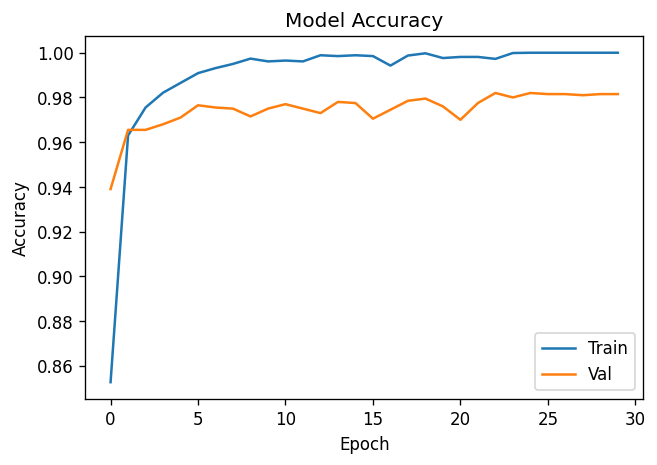

In [15]:
import matplotlib.pyplot as plt

# plot the training and validation accuracy over each epoch
plt.rcParams['figure.dpi'] = 120
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

313/313 [==============================] - 1s 3ms/step


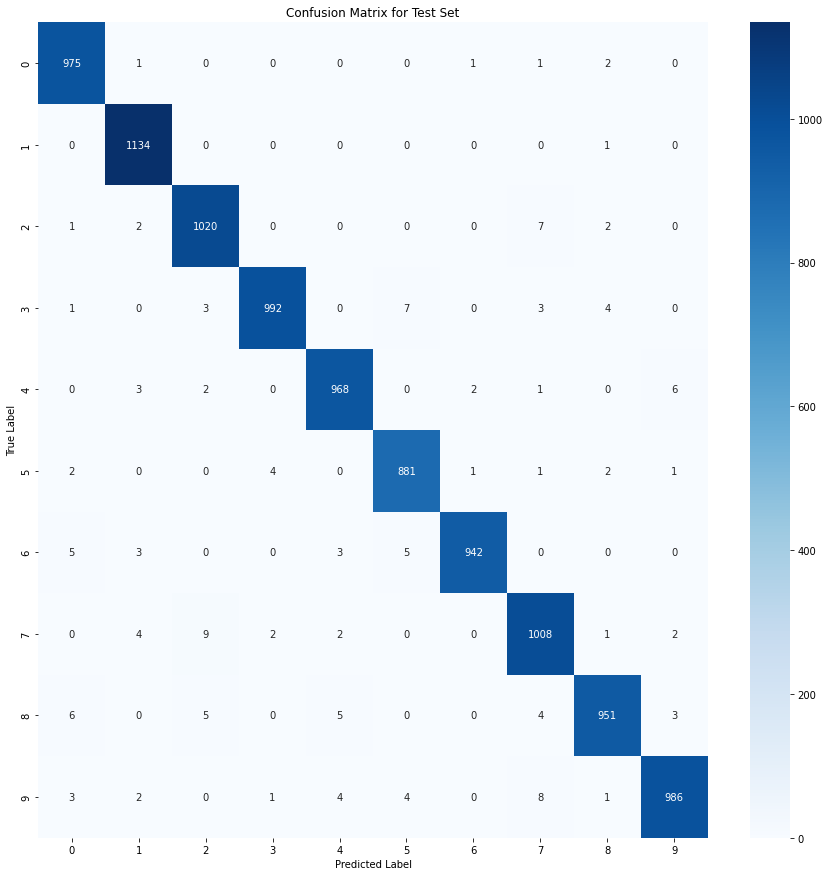

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# make predictions on the test set
y_pred = model.predict(X_test)

# convert one-hot encoded predictions to integer labels
y_pred = np.argmax(y_pred, axis=1)

# convert one-hot encoded labels to integer labels
y_true = np.argmax(y_test, axis=1)

# compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# plot the confusion matrix as a heatmap
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)

# add labels and title
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix for Test Set')
plt.show()


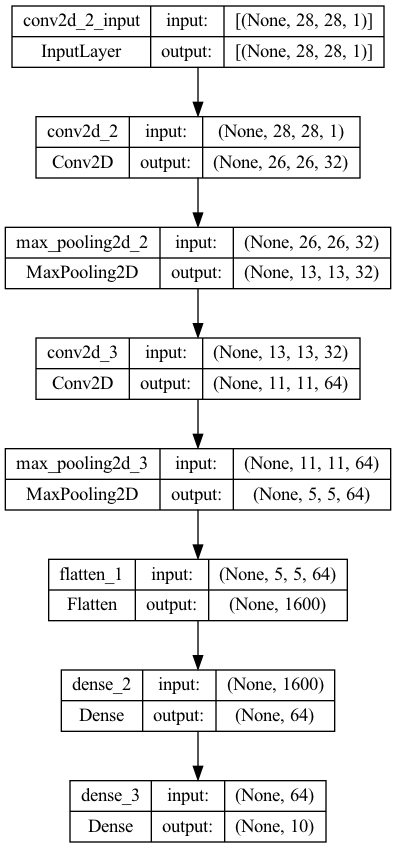

In [ ]:
import tensorflow as tf

tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)